In [1]:
import numpy

from hilbert import quantum
from hilbert.curves import lib

In [2]:
system = quantum.SplitToyTrain.mach_zehnder(1, 1)
system.hop_op.o

1.0                                               2.0  \
         -1.0                 0.0                 1.0  2.0 -1.0   
1.0 -1.0  0.0  0.000000+0.000000j  0.000000+0.000000j  0.0  0.0   
     0.0  1.0  0.000000+0.000000j  0.000000+0.000000j  0.0  0.0   
     1.0  0.0  0.707107+0.000000j  0.000000+0.000000j  0.0  0.0   
     2.0  0.0  0.000000+0.000000j  0.707107+0.000000j  0.0  0.0   
2.0 -1.0  0.0  0.000000+0.000000j  0.000000+0.000000j  1.0  0.0   
     0.0  0.0  0.000000+0.000000j  0.000000+0.000000j  0.0  1.0   
     1.0  0.0  0.707107+0.000000j  0.000000+0.000000j  0.0  0.0   
     2.0  0.0  0.000000+0.000000j  0.707107+0.000000j  0.0  0.0   

                                                       
                         0.0                 1.0  2.0  
1.0 -1.0  0.000000+0.000000j  0.000000+0.000000j  1.0  
     0.0  0.000000+0.000000j  0.000000+0.000000j  0.0  
     1.0 -0.707107+0.000000j  0.000000+0.000000j  0.0  
     2.0  0.000000+0.000000j -0.707107+0.000000j  0.0  
2.0 -1.0  0.000000+0.000000j  0.000000+0.000000j  0.0  
     0.0  0.000000+0.000000j  0.000000+0.000000j  0.0  
     1.0  0.707107+0.000000j  0.000000+0.000000j  0.0  
     2.0  0.000000+0.000000j  0.707107+0.000000j  0.0

In [3]:
system = quantum.SplitToyTrain.mach_zehnder(100, 100, 100, dict(theta=numpy.pi/3, phi=numpy.pi/7))
xc, xd, xe = (1, 50), (2, 50), (1, 105*system.cell)
std = 6
gaussian = system[0][1, 'delta']*system[1](lib.Gaussian(1, -1/(4*std**2), 20, pole=-35))

In [4]:
assert system.hop_op.is_unitary()

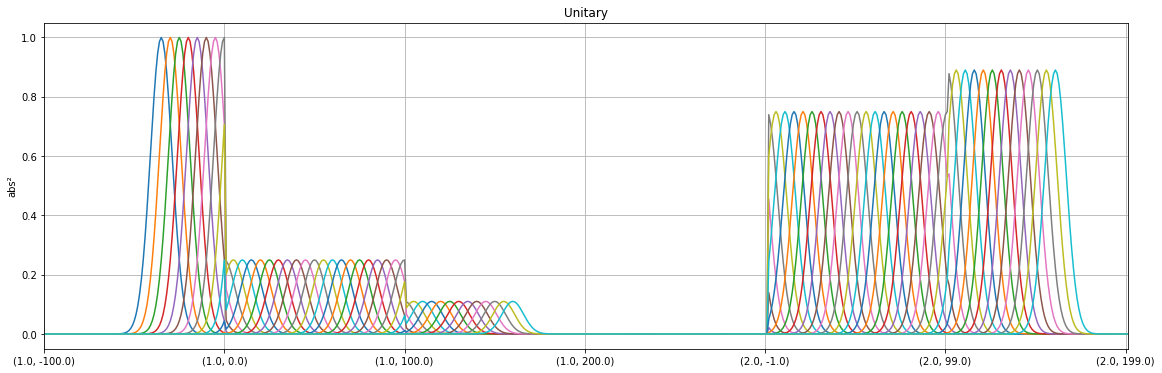

In [5]:
system.show_density_evolution(gaussian, 200, ncurves=40)

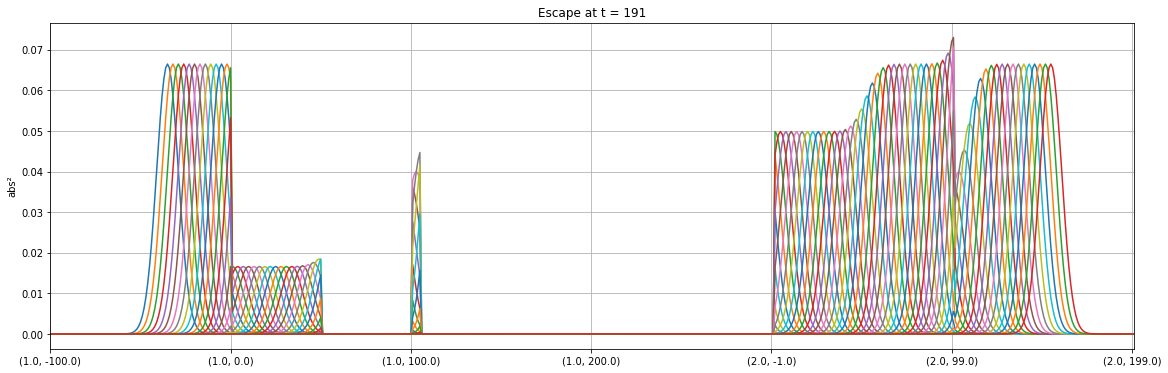

In [6]:
histories = system.collapsing_histories(gaussian, xc, xe, go_on=lambda v: round(1 - v[-1].image[2,106:].norm, 31))
histories.simulate_density(step=3)

In [7]:
assert round(histories.weight, 8) == 0.75*0.5, histories.weight

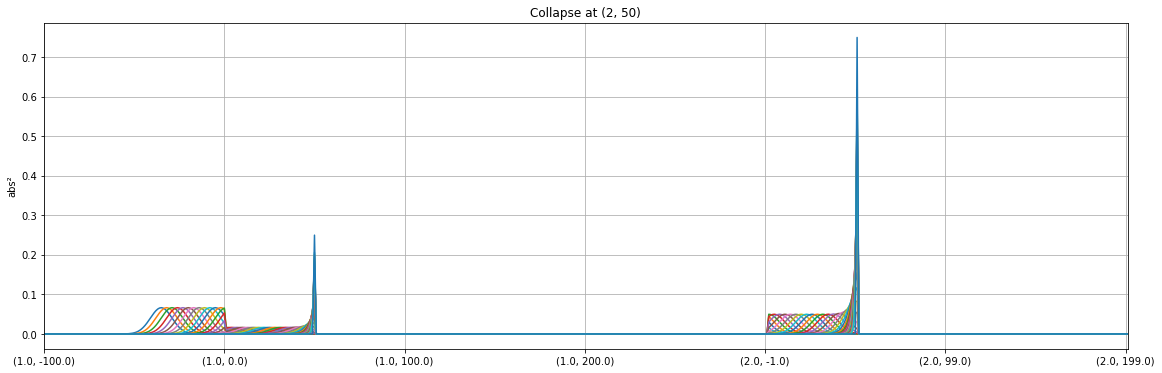

In [13]:
histories = system.collapsing_histories(gaussian, xc, xd)  # detector at each internal arm
histories.simulate_density()

In [28]:
assert list(numpy.around(histories.distribution, 15)) == [0.25, 0.75]

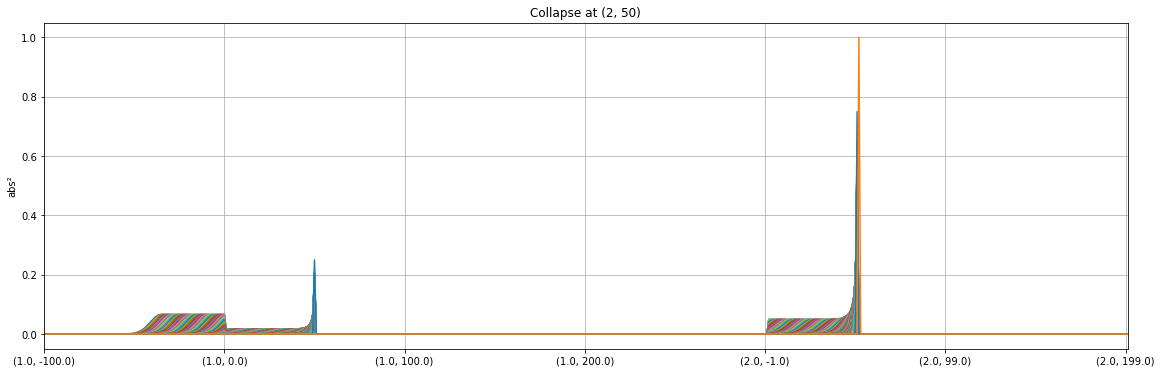

In [16]:
histories.simulate_density()

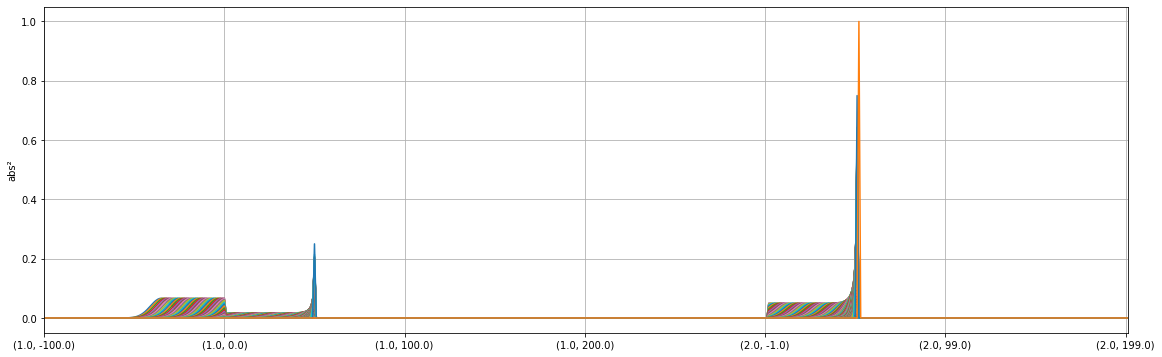

(<Figure size 1397.98x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdd1b653748>)

In [10]:
system.space.show_vectors_density(*histories.o[(2, 50)])

[0.2500000000000002, 0.7499999999999999]